# Импорт и начальная обработка

In [ ]:
# Импорт библиотек
import pandas as pd
from prophet import Prophet
import seaborn as sns

In [ ]:
# Чтение файла
df = pd.read_csv('Temp.csv')
# Преобразуем дату к виду date-time
df.Date = pd.to_datetime(df.Date)
# Переносим преобразованную дату в индекс
# df.set_index("Date", inplace = True)
df = df.iloc[0:730]
df.head(5)

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


<Axes: xlabel='Date'>

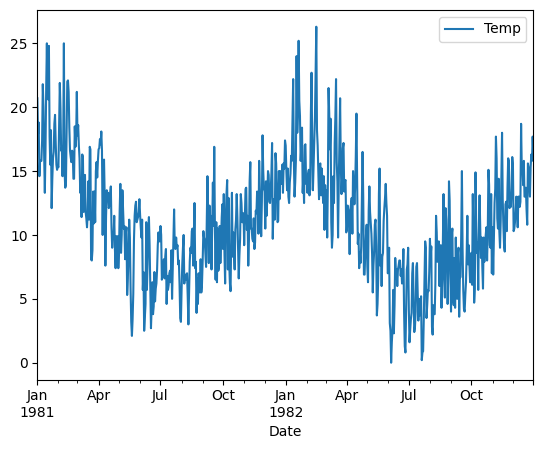

In [ ]:
# Постоим исхожный график
df.plot(x = 'Date', y = 'Temp')

Предполагаем, что не сможем точно предсказать последовательность в исходном виде, попробуем провести сглаживание с помощью скользящего среднего. Сглаживание проведём по неделям

In [ ]:
# Сглаживание по неделям
df_rol_w = pd.concat([df['Date'], df[['Temp']].rolling(7).mean()], axis = 1)

In [ ]:
# Удаление пустых данные вследствие сглаживания
df_rol_w.dropna(inplace = True)
df_rol_w.reset_index(drop=True, inplace = True)
df_rol_w.head()

,Date,Temp
0,1981-01-07,17.057143
1,1981-01-08,16.585714
2,1981-01-09,17.142857
3,1981-01-10,17.314286
4,1981-01-11,17.542857


<Axes: xlabel='Date'>

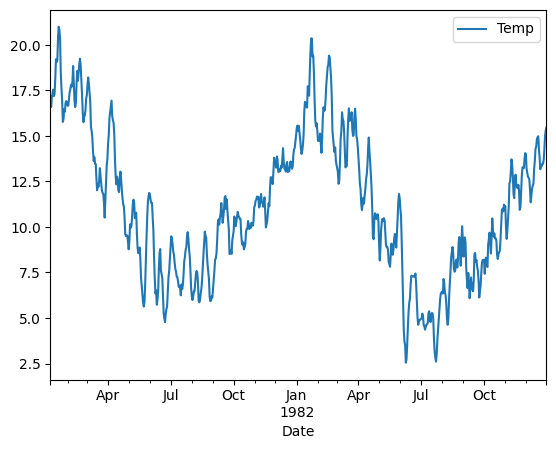

In [ ]:
# График после сглаживания
df_rol_w.plot(x = 'Date', y = 'Temp')

# Примение модели

In [ ]:
# Переименуем столбцы
df_rol_w.columns = ['ds', 'y']
df_rol_w.head(5)

,ds,y
0,1981-01-07,17.057143
1,1981-01-08,16.585714
2,1981-01-09,17.142857
3,1981-01-10,17.314286
4,1981-01-11,17.542857


In [ ]:
# Выделяем тренировочные и тестовые
df_rol_train = df_rol_w[:500]
df_rol_val = df_rol_w[500:600]
df_future = df_rol_w[600:]

Сайт с объяснением гиперпараметров модели: https://r-analytics.blogspot.com/2019/09/prophet.html

In [ ]:
# Определяем модель и задаём гиперпараметры
model = Prophet(daily_seasonality=True, yearly_seasonality=True)
model.fit(df_rol_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp29uqvfqv/nj6zppok.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp29uqvfqv/t3uuyacz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29680', 'data', 'file=/tmp/tmp29uqvfqv/nj6zppok.json', 'init=/tmp/tmp29uqvfqv/t3uuyacz.json', 'output', 'file=/tmp/tmp29uqvfqv/prophet_modeli3awp08u/prophet_model-20240127125807.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:58:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:58:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Делаем предсказание на
pred = model.predict(df_rol_val)
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1982-05-22,15.148735,6.926327,10.259258,15.148735,15.148735,-6.536079,-6.536079,-6.536079,-4.010899,...,-0.007913,-0.007913,-0.007913,-2.517266,-2.517266,-2.517266,0.0,0.0,0.0,8.612657
1,1982-05-23,15.147802,7.026161,10.371623,15.147802,15.147802,-6.512161,-6.512161,-6.512161,-4.010899,...,-0.011278,-0.011278,-0.011278,-2.489983,-2.489983,-2.489983,0.0,0.0,0.0,8.635641
2,1982-05-24,15.146869,7.027331,10.381316,15.146869,15.146869,-6.484266,-6.484266,-6.484266,-4.010899,...,-0.012549,-0.012549,-0.012549,-2.460817,-2.460817,-2.460817,0.0,0.0,0.0,8.662603
3,1982-05-25,15.145936,7.026644,10.394648,15.145936,15.145947,-6.442638,-6.442638,-6.442638,-4.010899,...,-0.000111,-0.000111,-0.000111,-2.431628,-2.431628,-2.431628,0.0,0.0,0.0,8.703297
4,1982-05-26,15.145002,7.160231,10.482718,15.144974,15.145085,-6.395937,-6.395937,-6.395937,-4.010899,...,0.019303,0.019303,0.019303,-2.404341,-2.404341,-2.404341,0.0,0.0,0.0,8.749065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1982-08-25,15.060080,5.447887,8.714268,15.018083,15.105386,-7.883551,-7.883551,-7.883551,-4.010899,...,0.019303,0.019303,0.019303,-3.891955,-3.891955,-3.891955,0.0,0.0,0.0,7.176529
96,1982-08-26,15.059147,5.424080,8.856884,15.016176,15.105316,-7.858361,-7.858361,-7.858361,-4.010899,...,0.008082,0.008082,0.008082,-3.855544,-3.855544,-3.855544,0.0,0.0,0.0,7.200786
97,1982-08-27,15.058213,5.517101,8.931397,15.014662,15.105111,-7.818491,-7.818491,-7.818491,-4.010899,...,0.004466,0.004466,0.004466,-3.812058,-3.812058,-3.812058,0.0,0.0,0.0,7.239722
98,1982-08-28,15.057280,5.610228,8.964002,15.013123,15.104828,-7.778930,-7.778930,-7.778930,-4.010899,...,-0.007913,-0.007913,-0.007913,-3.760118,-3.760118,-3.760118,0.0,0.0,0.0,7.278350


<Axes: xlabel='ds', ylabel='yhat'>

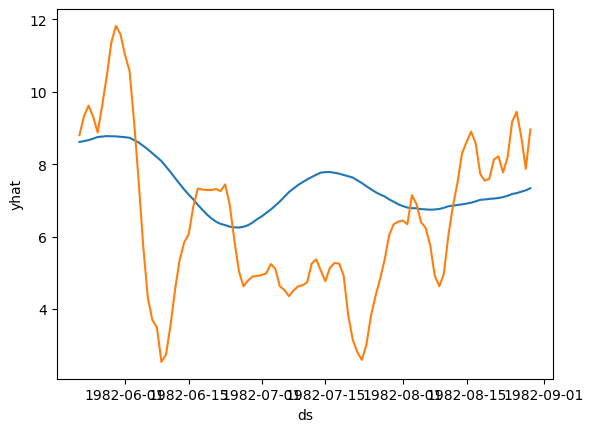

In [ ]:
# Сравниваем предсказанные результаты и фактические
sns.lineplot(data = pred, x = 'ds', y = 'yhat')
sns.lineplot(data = df_rol_val, x = 'ds', y = 'y' )

In [ ]:
from sklearn.metrics import r2_score
r2_score(df_rol_val['y'], pred['yhat'])

-0.0930348669301797

Попробуем сделать предсказания на будущее

In [ ]:
new_data = pd.DataFrame({'ds':df_future['ds']})

In [ ]:
new_data

,ds
600,1982-08-30
601,1982-08-31
602,1982-09-01
603,1982-09-02
604,1982-09-03
...,...
719,1982-12-27
720,1982-12-28
721,1982-12-29
722,1982-12-30


In [ ]:
res = model.predict(new_data)

In [ ]:
res

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1982-08-30,15.055414,5.625452,8.978097,15.055414,15.055414,-7.649332,-7.649332,-7.649332,-4.010899,...,-0.012549,-0.012549,-0.012549,-3.625883,-3.625883,-3.625883,0.0,0.0,0.0,7.406082
1,1982-08-31,15.054481,5.784597,9.275486,15.054481,15.054481,-7.552531,-7.552531,-7.552531,-4.010899,...,-0.000111,-0.000111,-0.000111,-3.541521,-3.541521,-3.541521,0.0,0.0,0.0,7.501950
2,1982-09-01,15.053547,5.931872,9.291863,15.053547,15.053547,-7.436265,-7.436265,-7.436265,-4.010899,...,0.019303,0.019303,0.019303,-3.444669,-3.444669,-3.444669,0.0,0.0,0.0,7.617282
3,1982-09-02,15.052614,5.943380,9.418651,15.052614,15.052614,-7.337753,-7.337753,-7.337753,-4.010899,...,0.008082,0.008082,0.008082,-3.334936,-3.334936,-3.334936,0.0,0.0,0.0,7.714861
4,1982-09-03,15.051681,6.121285,9.514634,15.051641,15.051701,-7.218689,-7.218689,-7.218689,-4.010899,...,0.004466,0.004466,0.004466,-3.212256,-3.212256,-3.212256,0.0,0.0,0.0,7.832992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1982-12-27,14.944361,11.490789,14.685083,14.877063,15.007781,-1.900876,-1.900876,-1.900876,-4.010899,...,-0.012549,-0.012549,-0.012549,2.122572,2.122572,2.122572,0.0,0.0,0.0,13.043485
120,1982-12-28,14.943428,11.472194,14.938574,14.875178,15.007470,-1.740763,-1.740763,-1.740763,-4.010899,...,-0.000111,-0.000111,-0.000111,2.270247,2.270247,2.270247,0.0,0.0,0.0,13.202665
121,1982-12-29,14.942495,11.584030,15.024431,14.873143,15.007131,-1.548148,-1.548148,-1.548148,-4.010899,...,0.019303,0.019303,0.019303,2.443448,2.443448,2.443448,0.0,0.0,0.0,13.394347
122,1982-12-30,14.941562,11.998098,15.335445,14.871222,15.006604,-1.362487,-1.362487,-1.362487,-4.010899,...,0.008082,0.008082,0.008082,2.640330,2.640330,2.640330,0.0,0.0,0.0,13.579075


<Axes: xlabel='ds', ylabel='yhat'>

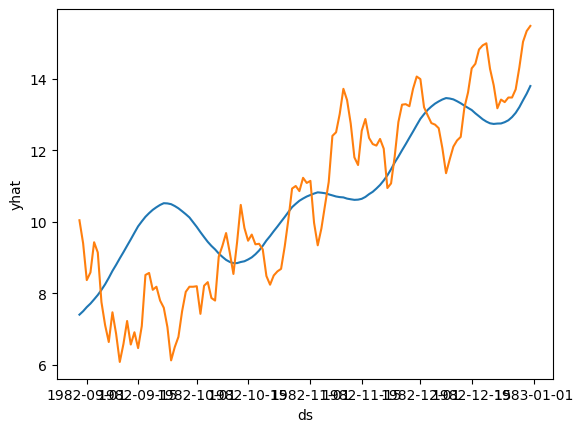

In [ ]:
sns.lineplot(data = res, x = 'ds', y = 'yhat')
sns.lineplot(data = df_future, x = 'ds', y = 'y')

# Оценка результатов построения модели

Figure(1000x600)


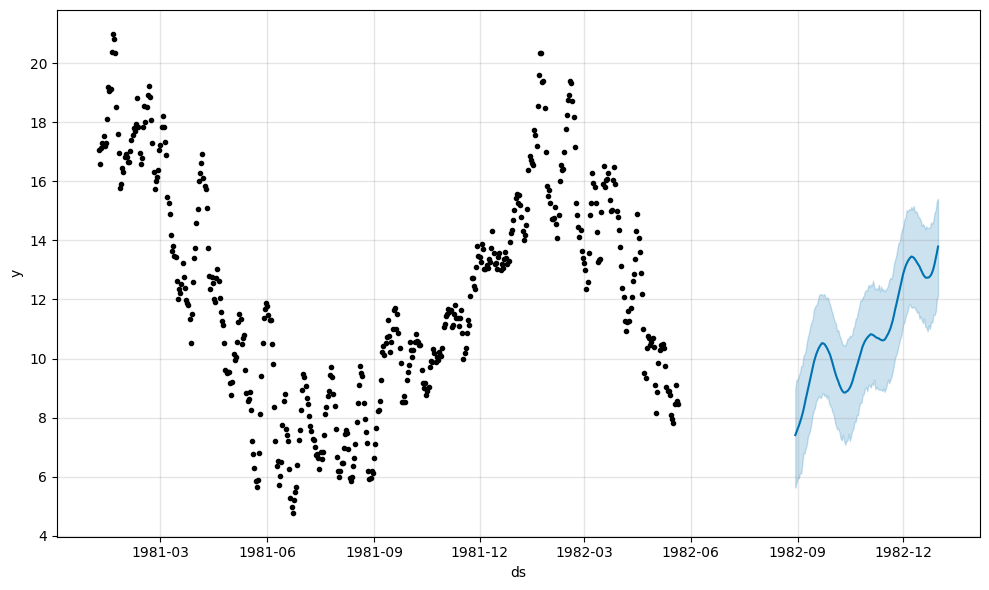

In [ ]:
print(model.plot(res))

Следующий график позволяет посмотреть отдельно на компоненты: тренд, годовую и недельную сезонность. Если при построении модели были заданы аномальные дни/праздники, то они также будут отображаться на этом графике.

Figure(900x1200)


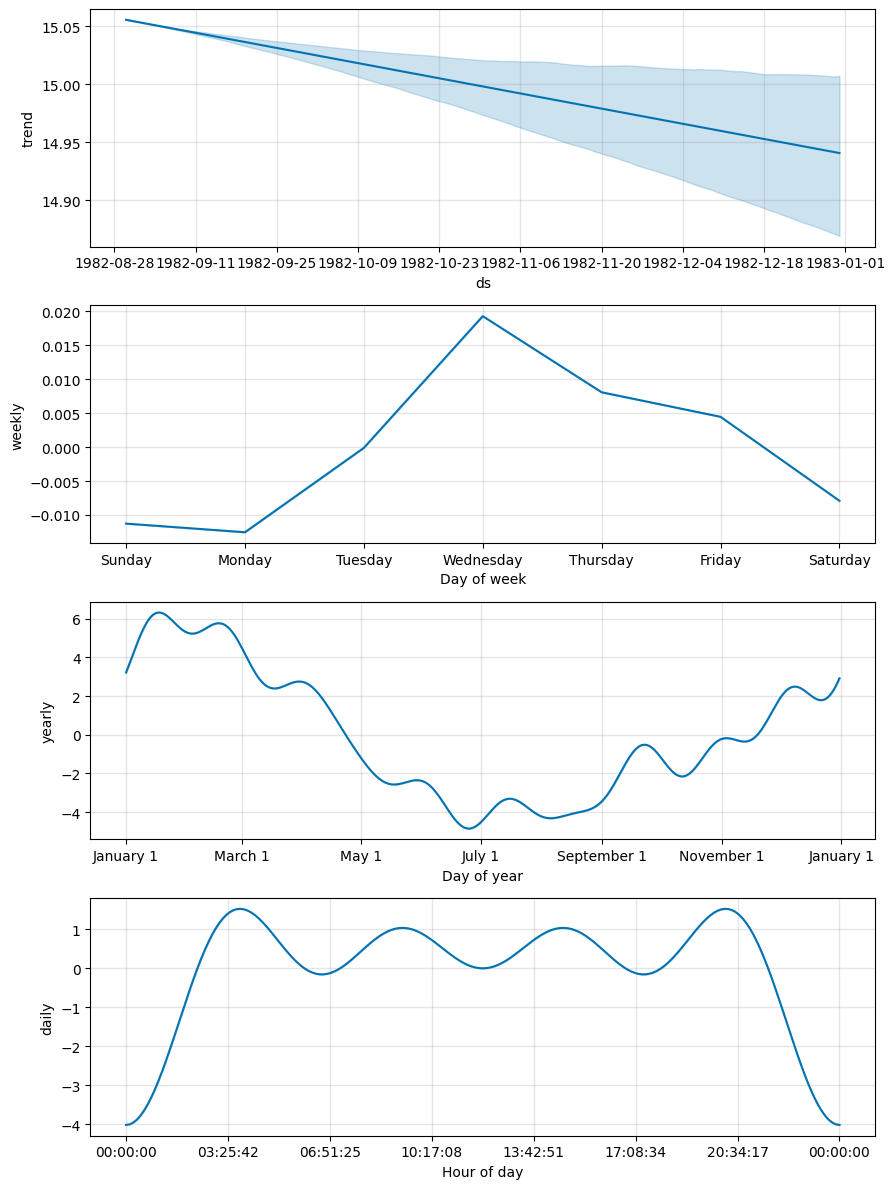

In [ ]:
print(model.plot_components(res))